In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import time
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1.EDA ##
### 1.1 Loading Data ###


In [40]:
dir_path= ('E:\\Postgraduate\\25S1\\COMP5329\\Assignment\\Assignment1\\Assignment1-Dataset\\')
train_file='train_data.npy'
train_label_file='train_label.npy'
train_data=np.load(dir_path+train_file)
train_label=np.load(dir_path+train_label_file)
train_X, val_X, train_y, val_y = train_test_split(train_data, train_label, test_size=0.2, random_state=5329, shuffle=True)
test_file='test_data.npy'
test_label_file='test_label.npy'
test_data=np.load(dir_path+test_file)
test_label=np.load(dir_path+test_label_file)


### 1.2 Check Dataset ###


In [41]:
train_data

array([[ -6.40101763,   2.72903876,   1.50171052, ...,   0.22933369,
         -0.1535829 ,   0.54404128],
       [  0.82978338,  -0.94994322,   6.0037526 , ...,   0.04319449,
         -0.0157158 ,  -0.28907615],
       [  7.73019978, -11.52210233,  -2.75362051, ...,   0.01458726,
         -0.35582987,   0.18428758],
       ...,
       [  0.70734659, -11.34252124,  -0.39391488, ...,  -0.49020993,
         -0.21487252,  -0.03641533],
       [ 11.36790901,  -3.37597765,   5.56619766, ...,  -0.63245635,
         -0.07775427,   0.56149881],
       [  4.19279645,  -1.18418848,  -4.44596297, ...,  -0.04935812,
          0.16881497,   0.07433337]])

In [42]:
train_label

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [43]:
test_data

array([[-3.47967057e+00,  9.06426369e-01,  1.25195572e+00, ...,
         8.61874214e-01,  6.31729322e-01,  2.60908392e-01],
       [ 9.94315784e+00, -9.58055259e+00,  5.06857801e+00, ...,
         1.63248427e-01, -3.18574521e-01, -2.67055346e-01],
       [ 4.70429957e+00, -8.83720616e+00,  4.10928532e+00, ...,
         5.57491883e-02,  2.65140024e-01,  1.67865616e-01],
       ...,
       [-1.52911933e+01,  2.50308666e+00, -2.27169405e-01, ...,
        -2.68454413e-01, -6.99688324e-02, -6.08919845e-01],
       [-5.85707877e+00,  2.04437491e+00,  3.65488937e+00, ...,
         7.85415991e-01,  6.86344933e-03,  2.01131653e-02],
       [-1.76542944e+00, -1.89117258e+00, -2.14885246e+00, ...,
        -4.11516440e-01,  1.87276097e-02,  2.38587672e-01]])

In [44]:
test_label

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [45]:
#Check data shapes and structure
print(f"Train data: {train_data.shape}")
print(f"Train label: {train_label.shape}")
print(f"Test data: {test_data.shape}")
print(f"Test label: {test_label.shape}")
# Check data types
print("=== Data Types ===")
print(f"Training data type: {train_data.dtype}")
print(f"Training labels type: {train_label.dtype}\n")
# Check missing value
print(f"Train data: {np.isnan(train_data).sum()} missing values")
print(f"Test data: {np.isnan(test_data).sum()} missing values")
#  Check for duplicates
train_df = pd.DataFrame(train_data)
print(f"\nDuplicate rows in training data: {train_df.duplicated().sum()}")

Train data: (50000, 128)
Train label: (50000, 1)
Test data: (10000, 128)
Test label: (10000, 1)
=== Data Types ===
Training data type: float64
Training labels type: uint8

Train data: 0 missing values
Test data: 0 missing values

Duplicate rows in training data: 0


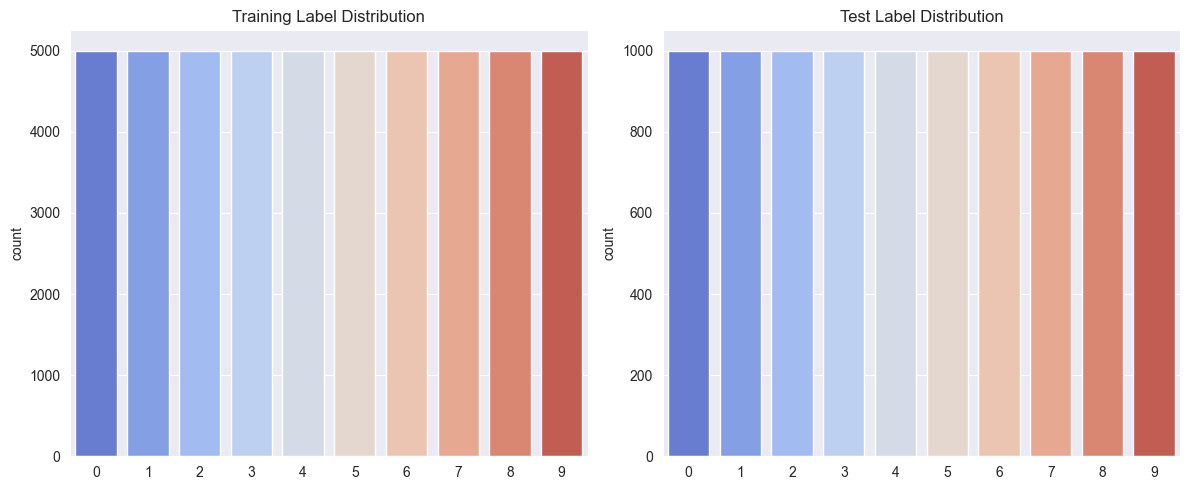

In [46]:
#Label Distribution Analysis
#Identify Class Imbalance
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=train_label.flatten(), ax=ax[0], palette='coolwarm')
ax[0].set_title('Training Label Distribution')

sns.countplot(x=test_label.flatten(), ax=ax[1], palette='coolwarm')
ax[1].set_title('Test Label Distribution')

plt.tight_layout()
plt.show()


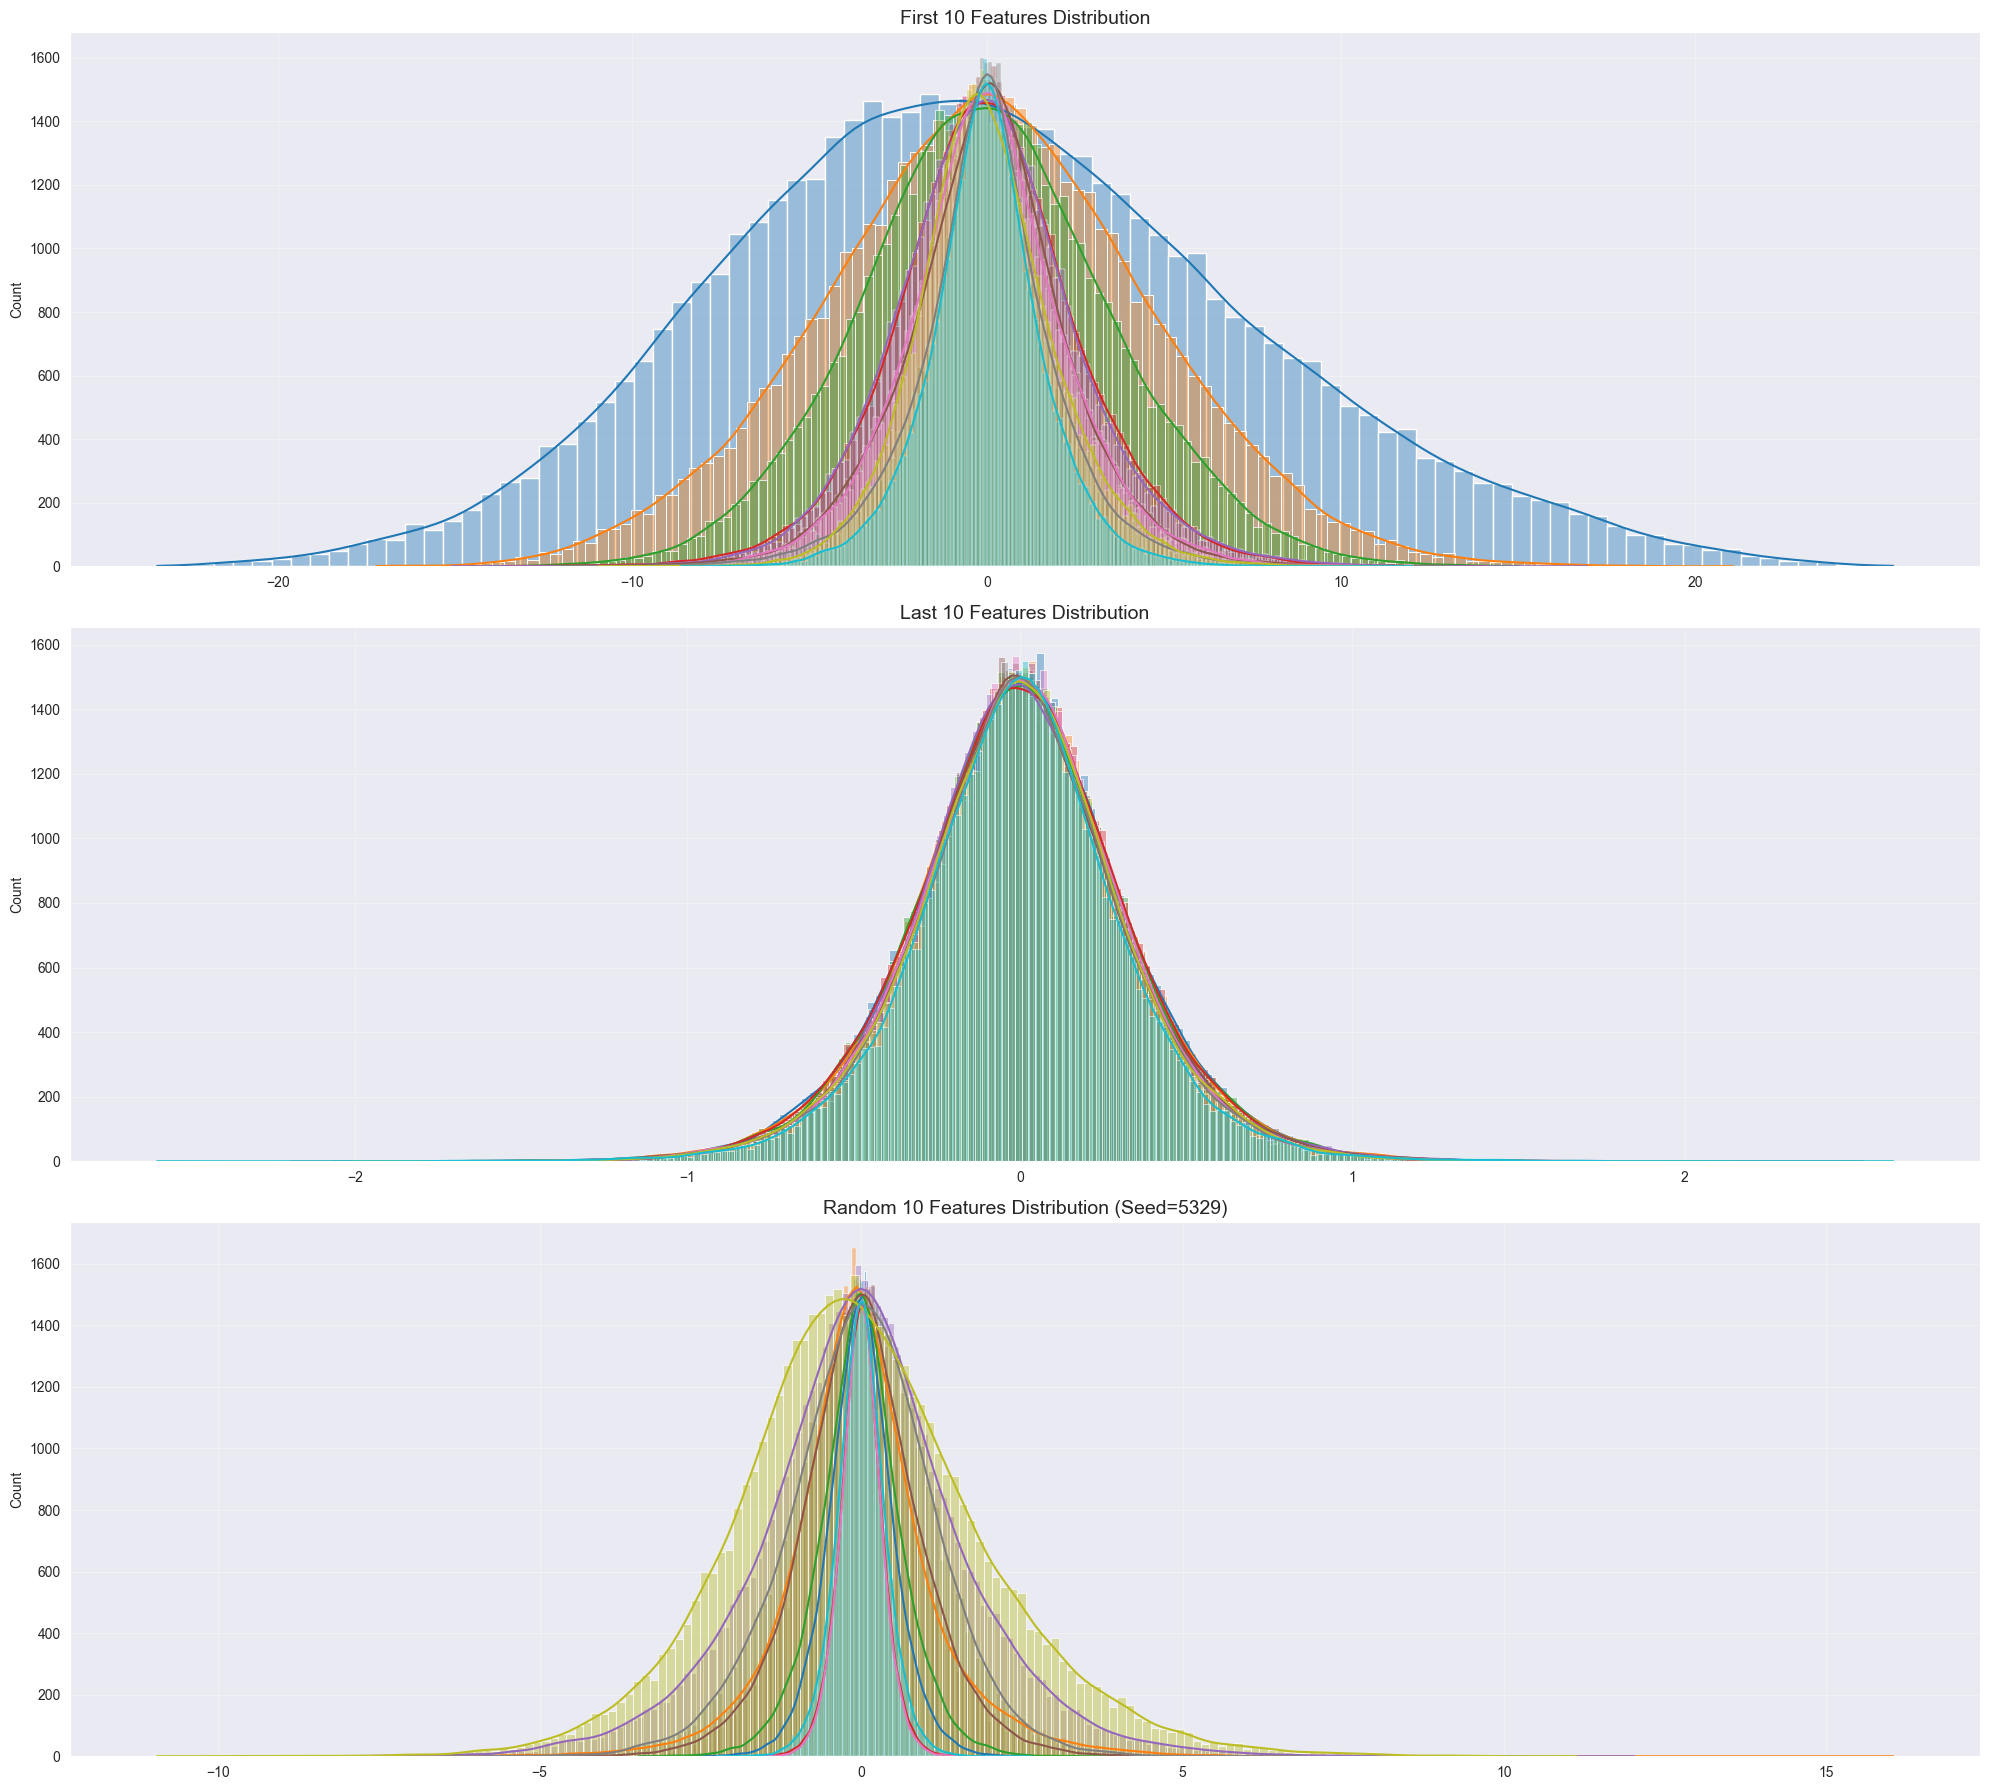

In [47]:
# Set random seed for reproducibility
np.random.seed(5329)

# Feature indices
num_features = train_data.shape[1]
first_10 = range(10)                   # First 10 features
last_10 = range(num_features-10, num_features)  # Last 10 features
random_10 = np.random.choice(num_features, 10, replace=False)  # Random 10 features

# Plot settings
plt.figure(figsize=(20, 18))

# --- First 10 Features ---
plt.subplot(3, 1, 1)
for i in first_10:
    sns.histplot(train_data[:, i], kde=True, alpha=0.4, label=f'Feature {i}')
plt.title('First 10 Features Distribution', fontsize=14)

plt.grid(alpha=0.3)

# --- Last 10 Features ---
plt.subplot(3, 1, 2)
for i in last_10:
    sns.histplot(train_data[:, i], kde=True, alpha=0.4, label=f'Feature {i}')
plt.title('Last 10 Features Distribution', fontsize=14)

plt.grid(alpha=0.3)

# --- Random 10 Features ---
plt.subplot(3, 1, 3)
for i in random_10:
    sns.histplot(train_data[:, i], kde=True, alpha=0.4, label=f'Feature {i}')
plt.title(f'Random 10 Features Distribution (Seed=5329)', fontsize=14)

plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 1.3 Pre-Processing ###
Min-max normalization:

$$x_{min-max} = {{x-min(x)}\over{max(x)-min(x)}}$$

Standardization:

$$x_{norm} = {{x-\mu}\over{\sigma}}$$

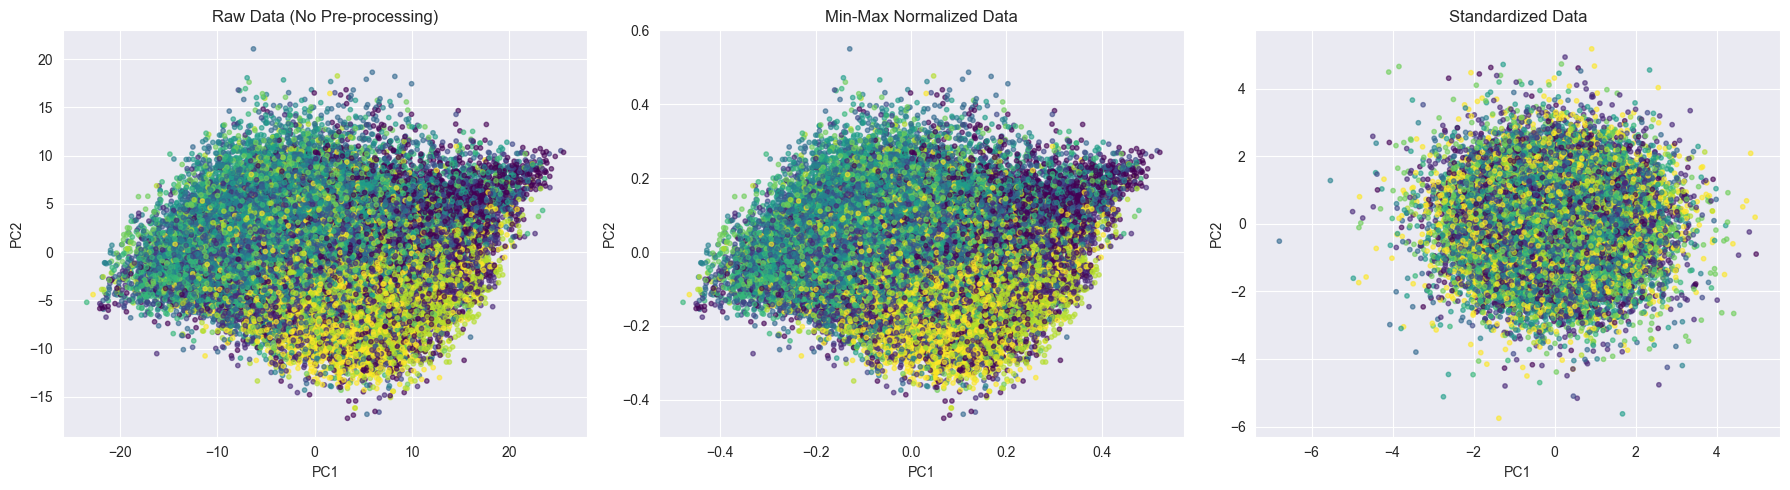

In [48]:
def pre_processing(X, mode=None):
    if mode == 'min-max':
        min_each_feature = np.min(X, axis=0)
        max_each_feature = np.max(X, axis=0)
        scale = max_each_feature - min_each_feature
        scale[scale == 0] = 1  # To avoid divided by 0
        scaled_train = (X - min_each_feature) / scale
        return scaled_train

    if mode == 'standardization':
        std_each_feature = np.std(X, axis=0)
        mean_each_feature = np.mean(X, axis=0)
        std_each_feature[std_each_feature == 0] = 1  # To avoid divided by 0
        norm_train = (X - mean_each_feature) / std_each_feature
        norm_test = (X - mean_each_feature) / std_each_feature
        return norm_train


    return X


# Apply pre-processing to train_data
raw_data = train_data.copy()
minmax_data = pre_processing(raw_data, mode='min-max')
standardized_data = pre_processing(raw_data, mode='standardization')

# Reduce to 2D using PCA
pca = PCA(n_components=2)
raw_pca = pca.fit_transform(raw_data)
minmax_pca = pca.fit_transform(minmax_data)
standardized_pca = pca.fit_transform(standardized_data)
plt.figure(figsize=(18, 5))

# Raw Data
plt.subplot(1, 3, 1)
plt.scatter(raw_pca[:, 0], raw_pca[:, 1], c=train_label, cmap='viridis', alpha=0.6, s=10)
plt.title('Raw Data (No Pre-processing)')
plt.xlabel('PC1');
plt.ylabel('PC2')

# Min-Max Normalized
plt.subplot(1, 3, 2)
plt.scatter(minmax_pca[:, 0], minmax_pca[:, 1], c=train_label, cmap='viridis', alpha=0.6, s=10)
plt.title('Min-Max Normalized Data')
plt.xlabel('PC1');
plt.ylabel('PC2')

# Standardized
plt.subplot(1, 3, 3)
plt.scatter(standardized_pca[:, 0], standardized_pca[:, 1], c=train_label, cmap='viridis', alpha=0.6, s=10)
plt.title('Standardized Data')
plt.xlabel('PC1');
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

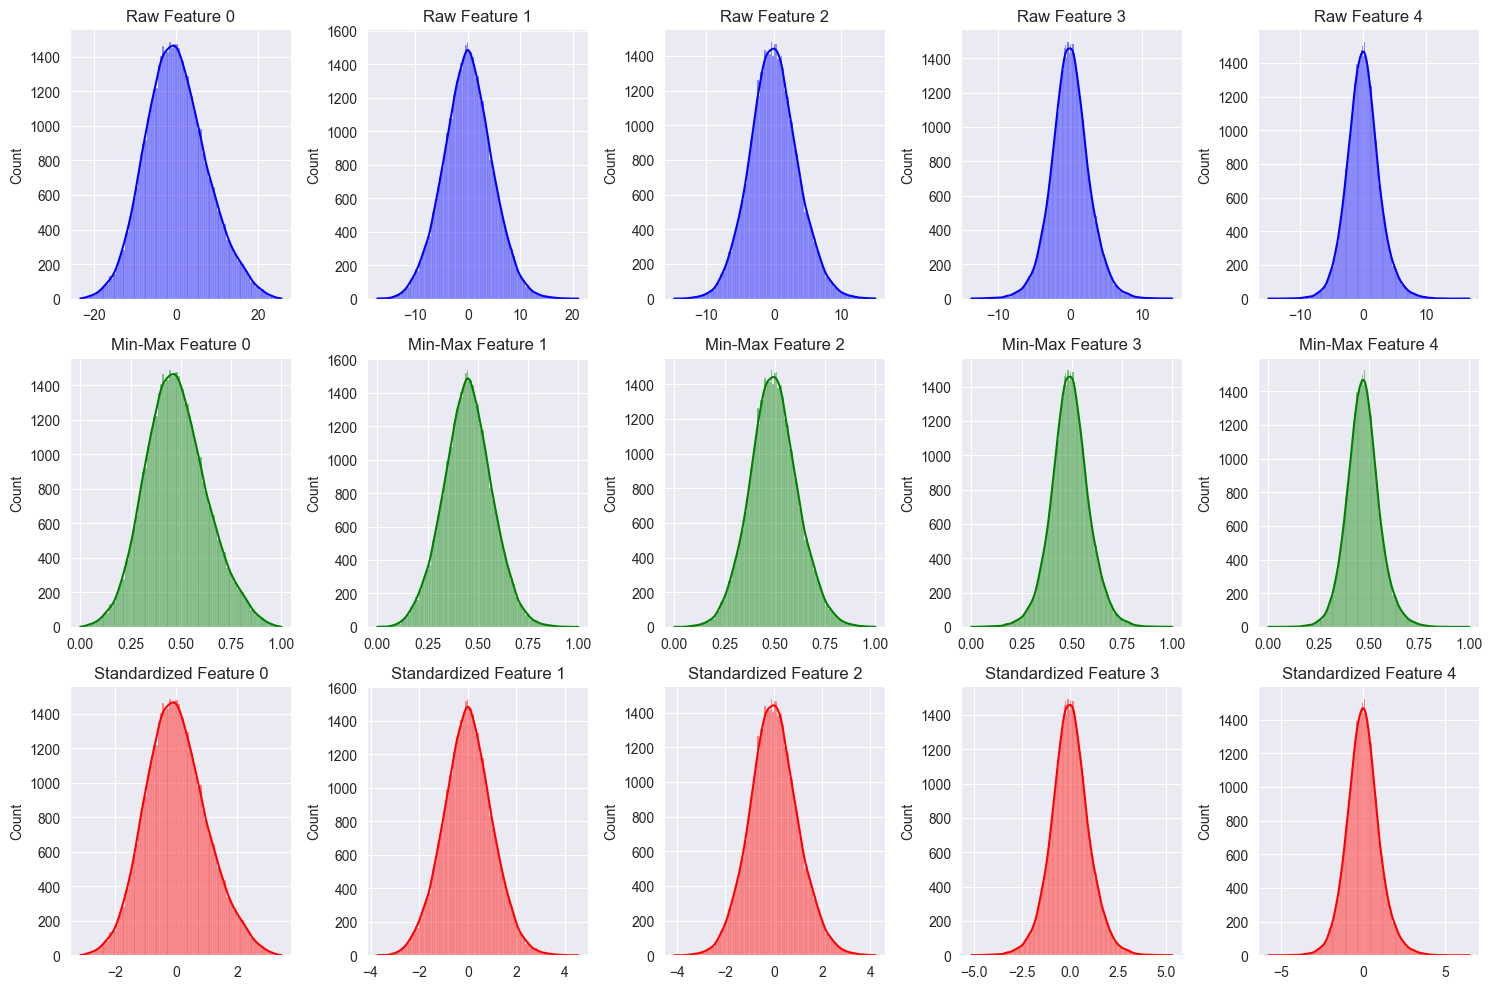

In [49]:
# Plot the distribution of the first 5 features before/after pre-processing:
plt.figure(figsize=(15, 10))
for i in range(5):
    # Raw Data
    plt.subplot(3, 5, i + 1)
    sns.histplot(raw_data[:, i], kde=True, color='blue')
    plt.title(f'Raw Feature {i}')

    # Min-Max
    plt.subplot(3, 5, i + 6)
    sns.histplot(minmax_data[:, i], kde=True, color='green')
    plt.title(f'Min-Max Feature {i}')

    # Standardized
    plt.subplot(3, 5, i + 11)
    sns.histplot(standardized_data[:, i], kde=True, color='red')
    plt.title(f'Standardized Feature {i}')

plt.tight_layout()
plt.show()

#train_X, val_X, train_y, val_y = train_test_split(train_data, train_label, test_size=0.2, random_state=5329,shuffle=True)

## 2.tools ##
### 2.1 Dataloader ###

In [50]:
class Dataloader(object):
    def __init__(self, X, y, batch_size, shuffle=True, seed=None):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.seed = seed
        self.index = np.arange(X.shape[0])

    def __iter__(self):
        if self.shuffle:
            if self.seed is not None:
                np.random.seed(self.seed)
            np.random.shuffle(self.index)
        self.n = 0
        return self

    def __next__(self):
        if self.n >= len(self.index):
            raise StopIteration
        index = self.index[self.n:self.n + self.batch_size]
        batch_X = self.X[index]
        batch_y = self.y[index]
        self.n += self.batch_size

        return batch_X, batch_y

    def __len__(self):
        return (len(self.index) + self.batch_size - 1) // self.batch_size

### 2.2 Layer ###


In [51]:
class Layer(object):
    def __init__(self, name, requires_grad=False):
        self.name = name
        self.requires_grad = requires_grad

    def _forward(self, *args):
        pass

    def _backward(self, *args):
        pass

### 2.3 Timer ###

In [52]:
def timer(func):
    def wrapper(*args, **kwargs):
        print('Start time: ', time.ctime())
        start_time = time.time()  # start time

        result = func(*args, **kwargs)  # run

        end_time = time.time()  # end time
        print('End time: ', time.ctime())
        print(f"{func.__name__} executed in {(end_time - start_time):.4f} seconds")
        return result
    return wrapper

### 2.4 Accuracy ###


In [53]:
def accuracy(y_hat,y):
    '''
    y_hat : predicted value
    :param y_hat: [batch_size,num_of_class]
    :param y: [batch_size,1
    :return:
    '''
    preds=y_hat.argmax(axis=1,keepdims=True)
    return np.mean(preds == y)*100

### 2.5 AverageMeterics ###

In [54]:
class AverageMeterics(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

### 2.6 He-normalization ###

In [55]:
def calculate_gain(nonlinearity, param=None):
    gains = {
        'sigmoid': 1.0,
        'tanh': 5.0 / 3,
        'relu': math.sqrt(2.0),
        'selu': 3.0 / 4
    }

    if nonlinearity in gains:
        return gains[nonlinearity]

    if nonlinearity == 'leaky_relu':
        negative_slope = param if isinstance(param, (int, float)) and not isinstance(param, bool) else 0.01
        return math.sqrt(2.0 / (1 + negative_slope ** 2))

    raise ValueError(f"Unsupported nonlinearity: {nonlinearity}")

def calculate_fan(array):
    if array.ndim < 2:
        raise ValueError("Fan in and fan out require at least 2D tensors")

    fan_in = array.shape[1] * np.prod(array.shape[2:]) if array.ndim > 2 else array.shape[1]
    fan_out = array.shape[0] * np.prod(array.shape[2:]) if array.ndim > 2 else array.shape[0]

    return fan_in, fan_out

def get_correct_fan(array, mode):
    mode = mode.lower()
    if mode not in {'fan_in', 'fan_out'}:
        raise ValueError("Mode must be 'fan_in' or 'fan_out'")

    fan_in, fan_out = calculate_fan(array)
    return fan_in if mode == 'fan_in' else fan_out

def kaiming_normal(array: np.ndarray, a: float = 0, mode: str = 'fan_in', nonlinearity: str = 'relu'):
    fan = get_correct_fan(array, mode)
    gain = calculate_gain(nonlinearity, a)
    std = gain / math.sqrt(fan)
    return np.random.normal(0, std, array.shape)

### 2.7 Xavier Initialization ###

In [56]:
def Xavier_init(n_in,n_out):
    W=np.random.uniform(
        low=-np.sqrt(6. / (n_in + n_out)),
        high=np.sqrt(6. / (n_in + n_out)),
        size=(n_in, n_out)
    )
    return W

In [57]:
class CosineLR:
    def __init__(self, optimizer, T_max, eta_min=0):
        self.optimizer = optimizer
        self.T_max = T_max
        self.eta_min = eta_min
        self.last_epoch = 0
        self.lr_initial = [group['lr'] for group in optimizer.param_groups]

    def step(self):
        self.last_epoch += 1
        for i, param_group in enumerate(self.optimizer.param_groups):
            lr = self.eta_min + (self.lr_initial[i] - self.eta_min) * (1 + math.cos(math.pi * self.last_epoch / self.T_max)) / 2
            param_group['lr'] = lr

## 3 Main part ##
### 3.1 FC Layer ###
Forward:

$$\mathbf{y} = \mathbf{xW} + \mathbf{b}$$

Backward:

$$\frac{\partial L}{\partial \mathbf{x}} = \frac{\partial L}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{x}} = \frac{\partial L}{\partial \mathbf{y}} \mathbf{W}^T$$

Gradient of W:

$$\frac{\partial L}{\partial \mathbf{W}} = \frac{\partial L}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{W}} = \frac{\partial L}{\partial \mathbf{y}} \mathbf{x}^T$$

Gradient of b:

$$\frac{\partial L}{\partial \mathbf{b}} = \frac{\partial L}{\partial \mathbf{y}} $$

Gradient of x:
$$\frac{\partial L}{\partial \mathbf{x}} = \frac{\partial L}{\partial \mathbf{y}} \mathbf{W}^T$$

In [58]:
class FCLayer(Layer):
    def __init__(self, name: str, n_in: int, n_out: int, skip_decay=False) -> None:
        '''
        Weight matrix W is of shape (n_in,n_out)
        and the bias vector b is of shape (n_out,)
        :param n_in: dimensionality of input
        :param n_out: number of hidden units
        '''
        super().__init__(name, requires_grad=True)
        self.n_in = n_in
        self.n_out = n_out
        W = kaiming_normal(np.array([0] * n_in * n_out).reshape(n_in, n_out), a=math.sqrt(5))
        self.W = W
        self.b = np.zeros(self.n_out)
        self.W_grad = None
        self.b_grad = None
        self.skip_decay = skip_decay

    def _forward(self, x: np.ndarray) -> np.ndarray:
        """
            x: [batch size, n_in]
            W: [n_in, n_out]
            b: [n_out]
        """
        self.x = x
        temp = x @ self.W + self.b
        # [batch_size,n_in] @ [n_in,n_out] + [n_output] => [batch_size,n_out]
        # return x @ self.W + self.b
        return temp

    def _backward(self, delta: np.ndarray) -> np.ndarray:
        '''
        delta: the gradient of the loss function respect to this layer's output 这层损失函数对于这层输出的梯度
        :param delta: [batch size, n_out]:
        :return:
        '''
        batch_size = delta.shape[0]
        self.W_grad = self.x.T @ delta / batch_size  # [batch_size,n_in]^T @ [batch size, n_out] => [n_in,n_out]
        self.b_grad = delta.sum(axis=0) / batch_size  # divide by batch size to get average of gradient
        return delta @ self.W.T  # return the gradient of input(x) back to last layer

### 3.2 Relu Layer ###


In [59]:
class ReLU(Layer):
    def __init__(self, name, requires_grad=False):
        super().__init__(name, requires_grad)

    def _forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def _backward(self, gradient_output):
        gradient_output[self.x <= 0] = 0
        return gradient_output

### 3.3 Softmax & Loss Function - Cross Entropy ###
 Softmax Formula:
$$softmax(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}$$

 Cross Entropy Formula:
$$CrossEntropy= - \sum_{i=1}^{n} y_i log(\hat {y_i})$$

Gradient of softmax:

$$\frac{\partial L}{\partial z_k} = \sum_{i}^{c} \left( \frac{\partial L}{\partial \hat{y}_i} \frac{\partial \hat{y}_i}{\partial z_k} \right)$$

$$\frac{\partial L}{\partial \hat{y}_i} = - \frac{y_i}{\hat{y}_i}, \qquad \frac{\partial \hat{y}_i}{\partial z_k} = \begin{cases}
\hat{y}_i(1 - \hat{y}_i) & \text{if } i = k \\
-\hat{y}_k\hat{y}_i & \text{if } i \neq k
\end{cases}
$$

$$\frac{\partial L}{\partial z_k} = - \left( (y_k(1 - \hat{y}_k)) - \sum_{i \neq k}^{c} y_i \hat{y}_k \right) = -(y_k - \hat{y}_k \sum_{i}^{c} y_i) = \hat{y}_k - y_k
$$

$$=> \frac{\partial L}{\partial z} = \hat{y} - y$$

In [60]:
class Softmax(Layer):
    def __init__(self,name,requires_grad=False):
        super().__init__(name,requires_grad)
    def _forward(self, x: np.ndarray) -> np.ndarray:
        x_exp =  np.exp(x - np.max(x, axis=1, keepdims=True))
        return x_exp/x_exp.sum(axis=1, keepdims=True)
    def _backward(self, gradient_output: np.ndarray) -> np.ndarray:
        return gradient_output


class CrossEntropy(object):
    def __init__(self,label_smoothing=0.1):
        self.softmax = Softmax('softmax')
        self.label_smoothing=label_smoothing
    def __call__(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        '''

        :param x:
        :param y: [batch_size, 1]
        :return:
        '''
        self.batch_size = x.shape[0]
        self.class_num = x.shape[1]
        y_hat = self.softmax._forward(x) #[batch_size,num_class]
        y=self.one_hot_encoding(y,self.label_smoothing)
        self.grad = y_hat - y
        loss = -1 * (y * np.log(y_hat + 1e-8)).sum() / self.batch_size  # to avoid divided by 0
        return loss

    def one_hot_encoding(self, x:np.ndarray,alpha=0.1)-> np.ndarray:
        one_hot_encoded = np.zeros((self.batch_size, self.class_num))
        one_hot_encoded[np.arange(x.shape[0]), x.flatten()] = 1
        one_hot_encoded = one_hot_encoded * (1-alpha) + alpha/self.class_num
        return one_hot_encoded


### 3.4 Regularization ###
#### 3.4.1 Batch Normalization (BN) ####
The core idea is to normalize the activation values of input neurons at each layer and then scale and shift them to maintain the expressive power of the model.
Forward:
$$\hat x_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}}$$
$$\mathbf{y}=\gamma\frac{\mathbf{x}-E(\mathbf{x})}{\sqrt{\sigma^2_B+\epsilon}}+\beta = \gamma \hat {\mathbf{x}}+\beta$$

$E(\mathbf{x})$ is the mean of the current mini-batch, $\sigma^2_B$ is the variance of the current mini-batch

Backward:

m is the number of batch size



Gradient of $\gamma$:

$$\frac{\partial L}{\partial \gamma} = \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L}{\partial y_i} \frac{\partial y_i}{\partial \gamma} = \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L}{\partial y_i} \hat{x}_i
, \qquad where \ \ \hat{x}_i = \frac{x_i - \mu}{\sqrt{(\sigma^2)+\epsilon}}
$$
Gradient of $\beta$:

$$\frac{\partial L}{\partial \beta} = \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L}{\partial y_i} \frac{\partial y_i}{\partial \beta} = \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L}{\partial y_i}=\frac{1}{m}\sum_{i=1}^{m} gradient\_output$$

Gradient of $x_i$:

$$
\frac{\partial L}{\partial \sigma^2}
= \frac{\partial L}{\partial y_i} \cdot \frac{\partial y_i}{\partial \hat{x}_i} \cdot \frac{\partial \hat{x}_i}{\partial \sigma^2}
= \frac{\partial L}{\partial y_i} \cdot \gamma \cdot \left(-\frac{1}{2}\right) \hat{x}_i (\sigma^2+\epsilon)^{-1}
$$


to simplify the formula let $\sigma = \sqrt{\sigma^2+\epsilon}$ so the final formula is :
$$\frac{\partial L}{\partial \sigma^2} = -\frac{\gamma}{\sigma} \sum_{i=1}^{m} \hat {x_i}\frac{\partial L}{\partial \gamma} $$
$$\frac{\partial \mu}{\partial x_i}=\frac{1}{m}$$
$$\frac{\partial \sigma^2}{\partial x_i}=\frac{2}{m}(x_i-\mu)$$
$$\frac{\partial \hat {x_i}}{\partial x_i}=\frac{1}{\sigma} - \frac{1}{m}\sum_{j=1}^{m}\frac{1}{\sigma}$$

$$\frac{\partial L}{\partial \hat{x_i}}= \gamma \cdot  gradient\_output_i$$
$$\frac{\partial L}{\partial x_i} = \frac{\partial L}{\partial \hat x_i} \cdot \frac{\partial \hat x_i}{\partial x_i} + \frac{\partial L}{\partial \sigma^2} \cdot \frac{\partial \sigma^2}{\partial x_i} + \frac{\partial L}{\partial \mu} \cdot \frac{\partial \mu}{\partial x_i} \\=\frac{\gamma}{\sigma} \left( \frac{\partial L}{\partial y_i} - \frac{1}{m} \hat{x}_i \frac{\partial L}{\partial \gamma} - \frac{\partial L}{\partial \beta}  \right)$$

In [61]:
class BatchNormalization(Layer):
    def __init__(self, name, feature_num,skip_decay=True, epsilon=1e-5, requires_grad=True):
        super().__init__(name)
        self.epsilon = epsilon
        self.requires_grad = requires_grad
        self.skip_decay = skip_decay
        self.gamma = np.ones(feature_num)
        self.beta = np.zeros(feature_num)

        self.gamma_grad = None
        self.beta_grad = None

        self.ema = np.zeros(feature_num)
        self.emv = np.zeros(feature_num)

    def _forward(self, x: np.ndarray) -> np.ndarray:
        '''
        x: [batch_size,feature number]
        gamma: [feature number]
        beta: [feature number]
        :param x:
        :return:
        '''
        if self.train:
            batch_mean = x.mean(axis=0)
            batch_variance = x.var(axis=0)
            batch_std = np.sqrt(batch_variance + self.epsilon)
            # record exponential moving average and variance to
            momentum = 0.9
            self.ema = momentum * self.ema + (1 - momentum) * batch_mean
            self.emv = momentum * self.emv + (1 - momentum) * batch_variance
        else:
            batch_mean = self.ema.data
            batch_std = np.sqrt(self.emv + self.epsilon)
        self.norm = (x - batch_mean) / batch_std
        self.gamma_norm = self.gamma / batch_std

        return self.gamma * self.norm + self.beta

    def _backward(self, gradient_output: np.ndarray) -> np.ndarray:
        # make sure that gradient_output is the gradient of next layer, indicating that the gradient of loss about y
        batch_size = gradient_output.shape[0]
        self.gamma_grad = (gradient_output * self.norm).sum(axis=0) / batch_size
        self.beta_grad = gradient_output.sum(axis=0) / batch_size
        dLdx = self.gamma_norm * (gradient_output - self.norm * self.gamma_grad - self.beta_grad)
        return dLdx

#### 3.4.2 Dropout Layer ####

In [62]:
class Dropout(Layer):
    def __init__(self, name, drop_rate=0.5, requires_grad=False):
        super().__init__(name, requires_grad)
        self.drop_rate = drop_rate
        self.fix_value = 1 / (1 - self.drop_rate)   # to keep average fixed

    def _forward(self, x):
        if self.train:
            self.mask = np.random.uniform(0, 1, x.shape) > self.drop_rate
            return x * self.mask * self.fix_value
        else:
            return x

    def _backward(self, grad_output):
        if self.train:
            return grad_output * self.mask
        else:
            return grad_output

### 3.5 Optimizer ###
#### 3.5.1 SGD with Momentum ####
SGD Formula:
$$θ_{t+1}=θ_t−\eta  \cdot ∇L(θ_t)$$

Momentum 梯度下降的公式如下：
$$
\begin{equation}
v_t = \beta v_{t-1} - \eta \nabla L(\theta_t)
\end{equation}

\begin{equation}
\theta_{t+1} = \theta_t + v_t
\end{equation}
$$

其中：
$$
    v_t  是当前动量\\
    \beta  是动量系数（通常取 0.9）\\
    \eta  是学习率\\
    \nabla L(\theta_t)  是损失函数对参数的梯度
$$

In [63]:
class SGDMomentum:
    def __init__(self, model, lr=0.01, momentum=0.9, weight_decay=0.0001):
        self.model = model
        self.lr = lr
        self.momentum = momentum
        self.weight_decay = weight_decay
        self.v = [np.zeros(param[0].shape) for param in self.model.parameters]
    def get_parameters(self):
        parameters = []
        for layer in self.model.layers:
            if hasattr(layer, "W"):
                parameters.append([layer.W, layer.W_grad, layer.skip_decay])
            if hasattr(layer, "b"):
                parameters.append([layer.b, layer.b_grad, layer.skip_decay])
            if hasattr(layer, "gamma"):
                parameters.append([layer.gamma, layer.gamma_grad, layer.skip_decay])
            if hasattr(layer, "beta"):
                parameters.append([layer.beta, layer.beta_grad, layer.skip_decay])
        return parameters

    def step(self):
        self.parameters = self.get_parameters()
        # Retrieve parameters and gradients directly from the model
        for i, (v, param_list) in enumerate(zip(self.v, self.parameters)):
            param, param_grad, skip_decay = param_list
            if param_grad is not None:
                if not skip_decay:
                    param -= self.weight_decay * param  # Apply weight decay
                v[:] = self.momentum * v + self.lr * param_grad  # Update momentum term
                self.v[i] = v
                param -= v  # Update parameters


#### 3.5.2 AdamW ####
Formula:

$$m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$$

$$v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$$

$$ \text{bias correction: } \ \   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$

$$\theta_t = \theta_{t-1} - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$$

use decoupled weight decay:
$$
\theta_t = \theta_{t-1} - \eta \frac{\hat{m_t}}{\sqrt{\hat{v_t}} + \epsilon}
$$

$$
\theta_t = \theta_t (1 - \eta \lambda)
$$

In [64]:
class AdamW(object):
    '''
    the parameters have all the layers W and b
    '''

    def __init__(self, model, lr=1e-3, decoupled_weight_decay=0, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.model = model
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.decoupled_weight_decay = decoupled_weight_decay
        self.epsilon = epsilon
        self.t = 0
        self.m = [np.zeros(p[0].shape) for p in self.get_parameters()]
        self.v = [np.zeros(p[0].shape) for p in self.get_parameters()]

    def get_parameters(self):
        parameters = []
        for layer in self.model.layers:
            if hasattr(layer, "W"):
                parameters.append([layer.W, layer.W_grad, layer.skip_decay])
            if hasattr(layer, "b"):
                parameters.append([layer.b, layer.b_grad, layer.skip_decay])
            if hasattr(layer, "gamma"):
                parameters.append([layer.gamma, layer.gamma_grad, layer.skip_decay])
            if hasattr(layer, "beta"):
                parameters.append([layer.beta, layer.beta_grad, layer.skip_decay])
        return parameters

    def step(self):
        parameters = self.get_parameters()
        for i, (param_list, m, v) in enumerate(zip(parameters, self.m, self.v)):
            param, param_grad, skip_decay = param_list
            self.t += 1
            m = self.beta1 * m + (1 - self.beta1) * param_grad
            v = self.beta2 * v + (1 - self.beta2) * np.power(param_grad, 2)
            self.m[i] = m
            self.v[i] = v
            m_hat = m / (1 - np.power(self.beta1, self.t))
            v_hat = v / (1 - np.power(self.beta2, self.t))

            update = self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
            if not skip_decay:
                param -= update
                param *= (1 - self.lr * self.decoupled_weight_decay)
            else:
                param -= update

## 4 MLP ##
### 4.1 Building Model ###

In [65]:
# Paramater

batch_size=512
config={'lr': 0.005,
        'batch_size': batch_size,
        'momentum': 0.9,
        'weight_decay': 5e-4,
        'seed': 0,
        'epoch': 200,
        'optimizer': 'adamw',     # adamw, sgd
        'scheduler': None,      # cos, None
        'label_smoothing':0.1,
        'pre-process': 'standardization',      # min-max, standardization, None
        'print_freq': 50000 // batch_size // 5
        }
np.random.seed(config['seed'])


class MLP():
    def __init__(self):
        self.layers = [
            FCLayer('fc1', n_in=128, n_out=256),
            # Dropout('dropout1', 0.6),
            # ReLU('relu1'),
            # FCLayer('fc2', n_in=512, n_out=256),
            # Dropout('dropout2', 0.4),
            BatchNormalization("batchnorm1",feature_num=256),

            Dropout('dropout1',drop_rate=0.3),
            ReLU('relu1'),
            # ReLU('relu2'),
            FCLayer('fc2', n_in=256, n_out=128),
            BatchNormalization("batchnorm2",feature_num=128),
            Dropout('dropout2',drop_rate=0.3),
            ReLU('relu2'),

            FCLayer('fc3', n_in=128, n_out=10)
        ]
        self.parameters = []
        for layer in self.layers:
            if hasattr(layer, "W"):
                self.parameters.append([layer.W, layer.W_grad, layer.skip_decay])
            if hasattr(layer, "b"):
                self.parameters.append([layer.b, layer.b_grad, layer.skip_decay])
            if hasattr(layer, "gamma"):
                self.parameters.append([layer.gamma, layer.gamma_grad, layer.skip_decay])
            if hasattr(layer, "beta"):
                self.parameters.append([layer.beta, layer.beta_grad, layer.skip_decay])

    def _forward(self, x: np.ndarray) -> np.ndarray:
        for layer in self.layers:
            x= layer._forward(x)
        return x


    def _backward(self, gradient_output: np.ndarray) -> np.ndarray:
        for layer in self.layers[::-1]:
            gradient_output= layer._backward(gradient_output)
        return gradient_output

    def _fit(self,mode='train'):
        if mode=='train':
            for layer in self.layers:
                layer.train=True
        elif mode=='eval':
            for layer in self.layers:
                layer.train=False
    def _predict(self, x: np.ndarray) -> np.ndarray:
        self._fit('eval')
        y_hat = self._forward(x)
        return y_hat

### 4.2 Training Model ###

In [66]:
class Trainer(object):
    def __init__(self,config,model=None,train_loader=None,valid_loader=None):
        self.config=config
        self.epochs = self.config['epoch']
        self.lr=self.config['lr']
        self.model=model
        self.train_loader=train_loader
        self.valid_loader=valid_loader
        self.print_freq=self.config['print_freq']
        # self.scheduler= self.config['scheduler']
        self.train_accuracy=[]
        self.valid_accuracy=[]
        self.train_loss=[]
        self.valid_loss=[]
        self.criterion=CrossEntropy(config['label_smoothing'])
        if self.config['optimizer'] == 'sgd':
            self.optimizer = SGDMomentum(self.model, self.lr, self.config['momentum'],
                                         self.config['weight_decay'])
        elif self.config['optimizer'] == 'adamw':
            self.optimizer = AdamW(self.model, self.lr, self.config['weight_decay'])
            # if self.scheduler == 'cos':
            #     self.train_scheduler = CosineLR(self.optimizer, T_max=self.epochs)
    @timer
    def train(self):
        best_accuracy=0
        for epoch in range(self.epochs):
            print('current lr {:.5e}'.format(self.optimizer.lr))
            self.train_per_epoch(epoch)
            acc1 = self.validate(epoch)

            best_acc1 = max(acc1, best_accuracy)
            output_best = f'Best Accuracy: {best_acc1}.4f\n'
            print(output_best)

    def train_per_epoch(self,epoch):
        batch_time=AverageMeterics()
        losses=AverageMeterics()
        best_acc=AverageMeterics()
        self.model._fit()
        end_time = time.time()
        for i,(X,y) in enumerate(self.train_loader):
            y_hat=self.model._forward(X)
            loss=self.criterion(y_hat,y)

            self.model._backward(self.criterion.grad)
            self.optimizer.step()
            acc=accuracy(y_hat,y)
            losses.update(loss,X.shape[0])
            best_acc.update(acc,X.shape[0])

            batch_time.update(time.time() - end_time)
            end_time = time.time()
            if (i%self.print_freq ==0) or (i==len(self.train_loader)-1):
                print(f'Epoch: [{epoch + 1}][{i}/{len(self.train_loader) - 1}]\tTime {batch_time.val:.3f} (Avg-Time {batch_time.avg:.3f})\t '
                      f'Loss {losses.val:.4f} (Avg-Loss {losses.avg:.4f})\t'
                      f'Acc {best_acc.val:.4f} (Avg-Acc {best_acc.avg:.4f})')
        print(f'EPOCH: {epoch+1} train Results: Acc {best_acc.avg:.3f} Loss: {losses.avg:.4f}')
        self.train_loss.append(losses.avg)
        self.train_accuracy.append(best_acc.avg)
    def validate(self, epoch):
        batch_time = AverageMeterics()
        losses = AverageMeterics()
        best_acc = AverageMeterics()

        self.model._fit(mode='eval')

        end = time.time()
        for i, (X, y) in enumerate(self.valid_loader):
            # compute output
            y_hat = self.model._forward(X)
            loss = self.criterion(y_hat, y)

            # measure accuracy and record loss
            acc = accuracy(y_hat, y)
            losses.update(loss, X.shape[0])
            best_acc.update(acc, X.shape[0])

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

            if (i % self.print_freq == 0) or (i == len(self.valid_loader) - 1):
                print(f'Epoch: [{epoch + 1}][{i}/{len(self.valid_loader) - 1}]\tTime {batch_time.val:.3f} (Avg-Time {batch_time.avg:.3f})\t '
                      f'Loss {losses.val:.4f} (Avg-Loss {losses.avg:.4f})\t'
                      f'Acc {best_acc.val:.4f} (Avg-Acc {best_acc.avg:.4f})')

        print(f'EPOCH: {epoch+1} Validation Results: Acc {best_acc.avg:.3f} Loss: {losses.avg:.4f}')
        self.valid_loss.append(losses.avg)
        self.valid_accuracy.append(best_acc.avg)

        return best_acc.avg

## 5 Running Model ##
### 5.1 Loading Data ###

In [67]:
train_X=pre_processing(train_X,config['pre-process'])
val_X=pre_processing(val_X,config['pre-process'])
train_dataloader=Dataloader(train_X, train_y, config['batch_size'], shuffle=True, seed=config['seed'])
validation_dataloader=Dataloader(val_X, val_y, config['batch_size'], shuffle=False, seed=config['seed'])
test_X=np.load(dir_path+test_file)
test_label=np.load(dir_path+test_label_file)
test_X=pre_processing(test_X,config['pre-process'])
test_dataloader=Dataloader(test_X, test_label, config['batch_size'], shuffle=False, seed=config['seed'])

### 5.2 RUN!!!!!!!!! ###

In [ ]:
model = MLP()
trainer=Trainer(config,model,train_dataloader,validation_dataloader)
trainer.train()

Start time:  Mon Mar 31 14:57:53 2025
current lr 5.00000e-03
Epoch: [1][0/78]	Time 0.039 (Avg-Time 0.039)	 Loss 6.2814 (Avg-Loss 6.2814)	Acc 8.3984 (Avg-Acc 8.3984)
Epoch: [1][19/78]	Time 0.016 (Avg-Time 0.028)	 Loss 3.2251 (Avg-Loss 4.4104)	Acc 25.5859 (Avg-Acc 19.2285)
Epoch: [1][38/78]	Time 0.034 (Avg-Time 0.028)	 Loss 2.3565 (Avg-Loss 3.5414)	Acc 25.9766 (Avg-Acc 22.9567)
Epoch: [1][57/78]	Time 0.031 (Avg-Time 0.028)	 Loss 1.9604 (Avg-Loss 3.0628)	Acc 34.1797 (Avg-Acc 25.4748)
Epoch: [1][76/78]	Time 0.021 (Avg-Time 0.028)	 Loss 1.9146 (Avg-Loss 2.7879)	Acc 38.0859 (Avg-Acc 27.5999)
Epoch: [1][78/78]	Time 0.000 (Avg-Time 0.028)	 Loss 1.9728 (Avg-Loss 2.7754)	Acc 31.2500 (Avg-Acc 27.7350)
EPOCH: 1 train Results: Acc 27.735 Loss: 2.7754
Epoch: [1][0/19]	Time 0.016 (Avg-Time 0.016)	 Loss 1.8078 (Avg-Loss 1.8078)	Acc 42.3828 (Avg-Acc 42.3828)
Epoch: [1][19/19]	Time 0.000 (Avg-Time 0.007)	 Loss 1.8229 (Avg-Loss 1.8127)	Acc 41.1765 (Avg-Acc 41.4800)
EPOCH: 1 Validation Results: Acc 41.480